In [117]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
ibtracks_file = "IBTrACS.ALL.v04r01.nc"

In [3]:
tracks = xr.open_dataset(ibtracks_file)

In [4]:
tracks

<xarray.Dataset> Size: 4GB
Dimensions:           (storm: 13439, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] 39MB ...
    lat               (storm, date_time) float32 19MB ...
    lon               (storm, date_time) float32 19MB ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/159)
    numobs            (storm) float32 54kB ...
    sid               (storm) |S13 175kB ...
    season            (storm) float32 54kB ...
    number            (storm) int16 27kB ...
    basin             (storm, date_time) |S2 10MB ...
    subbasin          (storm, date_time) |S2 10MB ...
    ...                ...
    reunion_gust      (storm, date_time) float32 19MB ...
    reunion_gust_per  (storm, date_time) float32 19MB ...
    usa_seahgt        (storm, date_time) float32 19MB ...
    usa_searad        (storm, date_time, quadrant) float32 77MB ...
    storm_speed       (storm, date_time) float32 19MB ...
    storm_dir         (storm, date_time) float32 19MB ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Thu Apr  3 05:30:41 2025: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 5.0.7 (Homepage = ht...

In [5]:
tracks.name

<xarray.DataArray 'name' (storm: 13439)> Size: 2MB
[13439 values with dtype=|S128]
Dimensions without coordinates: storm
Attributes:
    long_name:              Name of system
    description:            May be a combination of names from different agen...
    coverage_content_type:  thematicClassification

In [6]:
b"IDA" in tracks.name

True

In [244]:
tracks.name[tracks.name != b"UNNAMED"]

<xarray.DataArray 'name' (storm: 5601)> Size: 717kB
array([b'ANN', b'BETTY', b'CONNIE', ..., b'JUDE', b'COURTNEY', b'DIANNE'],
      shape=(5601,), dtype='|S128')
Dimensions without coordinates: storm
Attributes:
    long_name:              Name of system
    description:            May be a combination of names from different agen...
    coverage_content_type:  thematicClassification

In [8]:
np.where(tracks.name == b"IDA")

(array([ 4745,  5195,  5203,  5579,  6015,  6319,  6659,  6935,  7143,
         7359,  7542,  7699,  7752,  8171,  8675,  9037,  9406, 11875,
        12434, 13085]),)

In [9]:
tracks.name[np.where(tracks.name == b"IDA")]

<xarray.DataArray 'name' (storm: 20)> Size: 3kB
array([b'IDA', b'IDA', b'IDA', b'IDA', b'IDA', b'IDA', b'IDA', b'IDA', b'IDA',
       b'IDA', b'IDA', b'IDA', b'IDA', b'IDA', b'IDA', b'IDA', b'IDA', b'IDA',
       b'IDA', b'IDA'], dtype='|S128')
Dimensions without coordinates: storm
Attributes:
    long_name:              Name of system
    description:            May be a combination of names from different agen...
    coverage_content_type:  thematicClassification

In [10]:
tracks.season[np.where(tracks.name == b"IDA")].values

array([1945., 1950., 1950., 1954., 1958., 1961., 1964., 1966., 1968.,
       1969., 1971., 1972., 1972., 1975., 1980., 1983., 1986., 2009.,
       2015., 2021.], dtype=float32)

In [11]:
track_ida = tracks.where((tracks.name == b"IDA") & (tracks.season == 2021), drop=True)
track_ida = track_ida.where(np.isfinite(track_ida.lat), drop=True)
track_ida = track_ida.squeeze()

In [12]:
track_ida

<xarray.Dataset> Size: 70kB
Dimensions:           (date_time: 77, quadrant: 4)
Coordinates:
    time              (date_time) datetime64[ns] 616B 2021-08-26T12:00:00.000...
    lat               (date_time) float32 308B 16.5 17.0 17.4 ... 47.6 47.1 46.6
    lon               (date_time) float32 308B -78.9 -79.2 -79.5 ... -63.7 -63.5
Dimensions without coordinates: date_time, quadrant
Data variables: (12/159)
    numobs            (date_time) float32 308B 77.0 77.0 77.0 ... 77.0 77.0 77.0
    sid               (date_time) object 616B b'2021239N17281' ... b'2021239N...
    season            (date_time) float32 308B 2.021e+03 2.021e+03 ... 2.021e+03
    number            (date_time) float32 308B 66.0 66.0 66.0 ... 66.0 66.0 66.0
    basin             (date_time) object 616B b'NA' b'NA' b'NA' ... b'NA' b'NA'
    subbasin          (date_time) object 616B b'CS' b'CS' b'CS' ... b'NA' b'NA'
    ...                ...
    reunion_gust      (date_time) float32 308B nan nan nan nan ... nan nan nan
    reunion_gust_per  (date_time) float32 308B nan nan nan nan ... nan nan nan
    usa_seahgt        (date_time) float32 308B nan nan nan nan ... nan nan nan
    usa_searad        (date_time, quadrant) float32 1kB nan nan nan ... nan nan
    storm_speed       (date_time) float32 308B 11.0 11.0 11.0 ... 12.0 10.0 10.0
    storm_dir         (date_time) float32 308B 330.0 330.0 325.0 ... 165.0 165.0
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Thu Apr  3 05:30:41 2025: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 5.0.7 (Homepage = ht...

In [13]:
track_ida.lat.values, track_ida.lon.values

(array([16.5, 17. , 17.4, 17.8, 18.3, 18.8, 19.4, 19.9, 20.4, 21. , 21.5,
        21.9, 22.4, 22.6, 23.2, 23.5, 23.9, 24.4, 25. , 25.6, 26.2, 26.7,
        27.2, 27.6, 28.1, 28.5, 28.9, 29.1, 29.2, 29.5, 29.9, 30.2, 30.6,
        31. , 31.5, 31.9, 32.2, 32.6, 33. , 33.4, 33.8, 34.1, 34.4, 34.7,
        35.1, 35.4, 35.8, 36.2, 36.7, 37.2, 37.7, 38.4, 39. , 39.4, 39.8,
        40.2, 40.6, 40.9, 41.4, 42.2, 43.3, 44.4, 45.4, 46.1, 46.6, 47.1,
        47.5, 48.1, 48.6, 48.8, 48.8, 48.8, 48.7, 48.2, 47.6, 47.1, 46.6],
       dtype=float32),
 array([-78.9, -79.2, -79.5, -79.8, -80.2, -80.5, -80.9, -81.3, -81.7,
        -82.2, -82.6, -82.6, -83.2, -83.5, -84.4, -84.7, -85.2, -85.7,
        -86.2, -86.6, -87.1, -87.6, -88.2, -88.7, -89.2, -89.6, -89.9,
        -90.2, -90.4, -90.6, -90.6, -90.7, -90.8, -90.9, -90.9, -90.7,
        -90.5, -90.3, -90. , -89.7, -89.4, -89. , -88.4, -87.8, -87.1,
        -86.3, -85.5, -84.6, -83.6, -82.6, -81.5, -80.1, -78.5, -77. ,
        -75.6, -74.2, -72.8, -71

In [14]:
track_ida.time.values

array(['2021-08-26T12:00:00.000039936', '2021-08-26T15:00:00.000039936',
       '2021-08-26T18:00:00.000039936', '2021-08-26T21:00:00.000039936',
       '2021-08-27T00:00:00.000039936', '2021-08-27T03:00:00.000039936',
       '2021-08-27T06:00:00.000039936', '2021-08-27T09:00:00.000039936',
       '2021-08-27T12:00:00.000039936', '2021-08-27T15:00:00.000039936',
       '2021-08-27T18:00:00.000039936', '2021-08-27T21:00:00.000039936',
       '2021-08-27T23:25:00.000045056', '2021-08-28T00:00:00.000039936',
       '2021-08-28T03:00:00.000039936', '2021-08-28T06:00:00.000039936',
       '2021-08-28T09:00:00.000039936', '2021-08-28T12:00:00.000039936',
       '2021-08-28T15:00:00.000039936', '2021-08-28T18:00:00.000039936',
       '2021-08-28T21:00:00.000039936', '2021-08-29T00:00:00.000039936',
       '2021-08-29T03:00:00.000039936', '2021-08-29T06:00:00.000039936',
       '2021-08-29T09:00:00.000039936', '2021-08-29T12:00:00.000039936',
       '2021-08-29T15:00:00.000039936', '2021-08-29

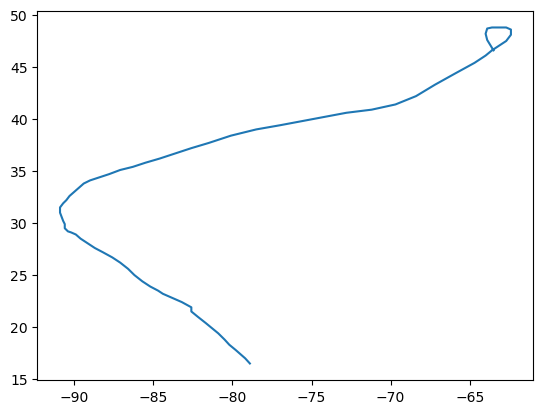

In [15]:
plt.plot(track_ida.lon.values.squeeze(), track_ida.lat.values.squeeze())

In [16]:
from scipy.interpolate import SmoothSphereBivariateSpline

In [17]:
spline = SmoothSphereBivariateSpline(
    np.radians(track_ida.lat.values.squeeze()) % np.pi, 
    np.radians(track_ida.lon.values.squeeze()) % (2*np.pi), 
    np.ones(track_ida.date_time.size), 
    s=1
)

In [18]:
from scipy.interpolate import make_splprep

In [19]:
spl_n, u_n = make_splprep((track_ida.lon.values.squeeze(), track_ida.lat.values.squeeze()), s=0.1)

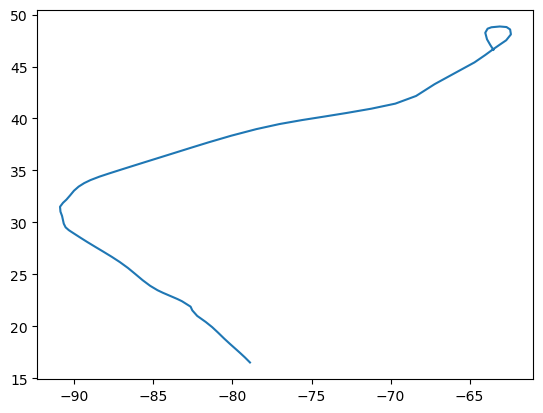

In [20]:
plt.plot(*spl_n(u_n))

In [21]:
from scipy.interpolate import make_splrep

In [22]:
lat_spl = make_splrep(track_ida.time.squeeze(), track_ida.lat.squeeze(), s=0.2)
lon_spl = make_splrep(track_ida.time.squeeze(), track_ida.lon.squeeze(), s=0.2)

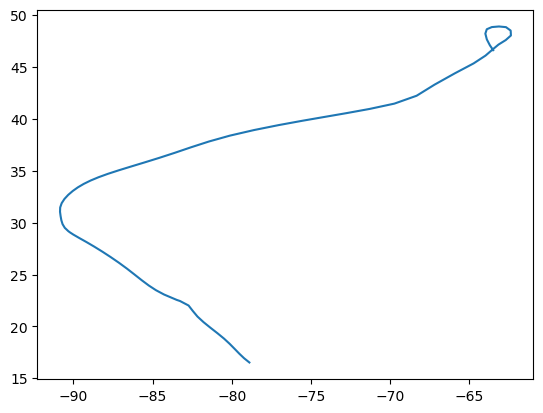

In [23]:
plt.plot(lon_spl(track_ida.time.squeeze()), lat_spl(track_ida.time.squeeze()))

In [24]:
import goes2go

/Users/jonesw/miniforge3/envs/hurricane_data_prep/lib/python3.13/site-packages/goes2go/data.py:673: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1h")),
/Users/jonesw/miniforge3/envs/hurricane_data_prep/lib/python3.13/site-packages/goes2go/NEW.py:185: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1h")),


In [27]:
abi_files = goes2go.goes_timerange(
    start=pd.to_datetime(track_ida.time.values[0]).to_pydatetime(), 
    end=pd.to_datetime(track_ida.time.values[-1]).to_pydatetime(),
    download=False,
    domain="F",
)

/var/folders/cw/ddjy53ds5h51szdq1630n50r0000gp/T/ipykernel_6044/2771675642.py:2: UserWarning: Discarding nonzero nanoseconds in conversion.
  start=pd.to_datetime(track_ida.time.values[0]).to_pydatetime(),
/var/folders/cw/ddjy53ds5h51szdq1630n50r0000gp/T/ipykernel_6044/2771675642.py:3: UserWarning: Discarding nonzero nanoseconds in conversion.
  end=pd.to_datetime(track_ida.time.values[-1]).to_pydatetime(),


In [28]:
abi_files

file      product_mode  \
0     noaa-goes16/ABI-L2-MCMIPF/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPF-M6   
1     noaa-goes16/ABI-L2-MCMIPF/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPF-M6   
2     noaa-goes16/ABI-L2-MCMIPF/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPF-M6   
3     noaa-goes16/ABI-L2-MCMIPF/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPF-M6   
4     noaa-goes16/ABI-L2-MCMIPF/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPF-M6   
...                                                 ...               ...   
1328  noaa-goes16/ABI-L2-MCMIPF/2021/247/17/OR_ABI-L...  ABI-L2-MCMIPF-M6   
1329  noaa-goes16/ABI-L2-MCMIPF/2021/247/17/OR_ABI-L...  ABI-L2-MCMIPF-M6   
1330  noaa-goes16/ABI-L2-MCMIPF/2021/247/17/OR_ABI-L...  ABI-L2-MCMIPF-M6   
1331  noaa-goes16/ABI-L2-MCMIPF/2021/247/17/OR_ABI-L...  ABI-L2-MCMIPF-M6   
1332  noaa-goes16/ABI-L2-MCMIPF/2021/247/17/OR_ABI-L...  ABI-L2-MCMIPF-M6   

     satellite                   start                     end  \
0          G16 2021-08-26 12:00:20.500 2021-08-26 12:09:52.400   
1          G16 2021-08-26 12:10:20.500 2021-08-26 12:19:51.300   
2          G16 2021-08-26 12:20:20.500 2021-08-26 12:29:51.300   
3          G16 2021-08-26 12:30:20.500 2021-08-26 12:39:51.300   
4          G16 2021-08-26 12:40:20.500 2021-08-26 12:49:52.400   
...        ...                     ...                     ...   
1328       G16 2021-09-04 17:10:22.200 2021-09-04 17:19:53.000   
1329       G16 2021-09-04 17:20:22.200 2021-09-04 17:29:53.600   
1330       G16 2021-09-04 17:30:22.200 2021-09-04 17:39:53.600   
1331       G16 2021-09-04 17:40:22.200 2021-09-04 17:49:53.600   
1332       G16 2021-09-04 17:50:22.200 2021-09-04 17:59:53.600   

                    creation        product mode_bands  mode  band  
0    2021-08-26 12:10:02.600  ABI-L2-MCMIPF         M6     6  None  
1    2021-08-26 12:20:01.800  ABI-L2-MCMIPF         M6     6  None  
2    2021-08-26 12:30:01.700  ABI-L2-MCMIPF         M6     6  None  
3    2021-08-26 12:40:01.900  ABI-L2-MCMIPF         M6     6  None  
4    2021-08-26 12:50:01.600  ABI-L2-MCMIPF         M6     6  None  
...                      ...            ...        ...   ...   ...  
1328 2021-09-04 17:20:03.900  ABI-L2-MCMIPF         M6     6  None  
1329 2021-09-04 17:30:04.000  ABI-L2-MCMIPF         M6     6  None  
1330 2021-09-04 17:40:03.900  ABI-L2-MCMIPF         M6     6  None  
1331 2021-09-04 17:50:03.900  ABI-L2-MCMIPF         M6     6  None  
1332 2021-09-04 18:00:03.700  ABI-L2-MCMIPF         M6     6  None  

[1333 rows x 10 columns]

In [29]:
file_time = abi_files.start + (abi_files.end - abi_files.start)/2

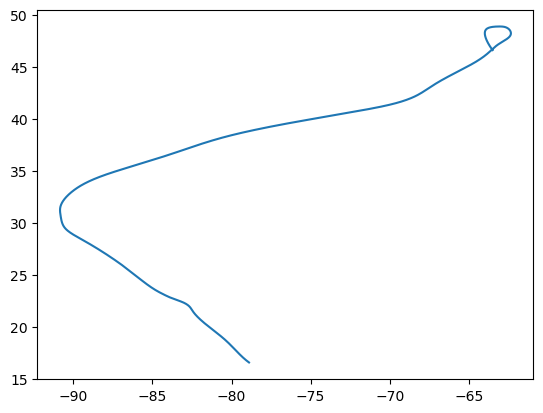

In [30]:
plt.plot(lon_spl(file_time), lat_spl(file_time))

In [31]:
import s3fs
fs = s3fs.S3FileSystem(anon=True)

In [32]:
import fsspec
fs = fsspec.filesystem('s3', anon=True)

In [33]:
abi_files.file[0]

'noaa-goes16/ABI-L2-MCMIPF/2021/238/12/OR_ABI-L2-MCMIPF-M6_G16_s20212381200205_e20212381209524_c20212381210026.nc'

In [34]:
fsspec_caching = {
    "cache_type": "blockcache",  # block cache stores blocks of fixed size and uses eviction using a LRU strategy.
    "block_size": 8
    * 1024
    * 1024,  # size in bytes per block, adjust depends on the file size but the recommended size is in the MB
}

In [92]:
goes_data = xr.open_dataset(fs.open(abi_files.file[500], **fsspec_caching), engine="h5netcdf")

In [93]:
goes_data

<xarray.Dataset> Size: 4GB
Dimensions:                                 (y: 5424, x: 5424,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2, band: 1)
Coordinates: (12/37)
    t                                       datetime64[ns] 8B ...
  * y                                       (y) float32 22kB 0.1518 ... -0.1518
  * x                                       (x) float32 22kB -0.1518 ... 0.1518
    y_image                                 float32 4B ...
    x_image                                 float32 4B ...
    band_wavelength_C01                     (band) float32 4B ...
    ...                                      ...
    band_id_C11                             (band) int8 1B ...
    band_id_C12                             (band) int8 1B ...
    band_id_C13                             (band) int8 1B ...
    band_id_C14                             (band) int8 1B ...
    band_id_C15                             (band) int8 1B ...
    band_id_C16                             (band) int8 1B ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/124)
    CMI_C01                                 (y, x) float32 118MB ...
    DQF_C01                                 (y, x) float32 118MB ...
    CMI_C02                                 (y, x) float32 118MB ...
    DQF_C02                                 (y, x) float32 118MB ...
    CMI_C03                                 (y, x) float32 118MB ...
    DQF_C03                                 (y, x) float32 118MB ...
    ...                                      ...
    mean_brightness_temperature_C16         float32 4B ...
    std_dev_brightness_temperature_C16      float32 4B ...
    percent_uncorrectable_GRB_errors        float32 4B ...
    percent_uncorrectable_L0_errors         float32 4B ...
    dynamic_algorithm_input_data_container  int32 4B ...
    algorithm_product_version_container     int32 4B ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    date_created:              2021-08-29T23:30:01.9Z
    time_coverage_start:       2021-08-29T23:20:20.3Z
    time_coverage_end:         2021-08-29T23:29:52.2Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        48c03b0b-8680-4834-8e3e-21f0102de57d

In [94]:
goes_data.CMI_C13

<xarray.DataArray 'CMI_C13' (y: 5424, x: 5424)> Size: 118MB
[29419776 values with dtype=float32]
Coordinates:
    t        datetime64[ns] 8B ...
  * y        (y) float32 22kB 0.1518 0.1518 0.1517 ... -0.1517 -0.1518 -0.1518
  * x        (x) float32 22kB -0.1518 -0.1518 -0.1517 ... 0.1517 0.1518 0.1518
    y_image  float32 4B ...
    x_image  float32 4B ...
Attributes:
    long_name:              ABI Cloud and Moisture Imagery brightness tempera...
    standard_name:          toa_brightness_temperature
    sensor_band_bit_depth:  12
    valid_range:            [   0 4095]
    units:                  K
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF_C13

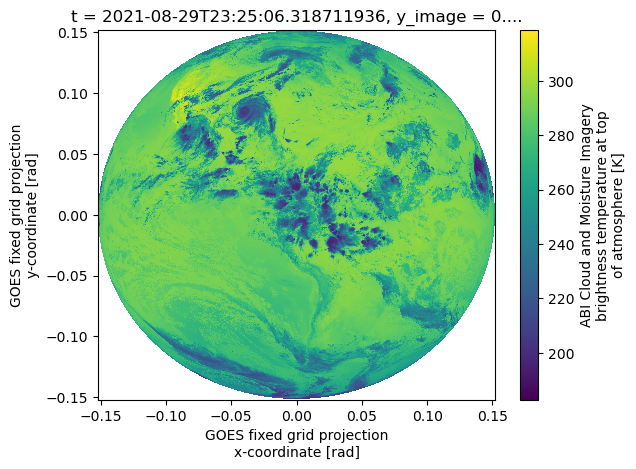

In [95]:
goes_data.CMI_C13.plot()

In [96]:
from tobac_flow import abi

In [97]:
lon_spl(file_time[500:501]), lat_spl(file_time[500:501])

(array([-90.65494931]), array([29.78167638]))

In [98]:
x, y = abi.get_abi_x_y( lat_spl(file_time[500:501]).item(), lon_spl(file_time[500:501]).item(), goes_data)

In [99]:
x, y

(np.float64(-0.04042345964106046), np.float64(0.08530553432539686))

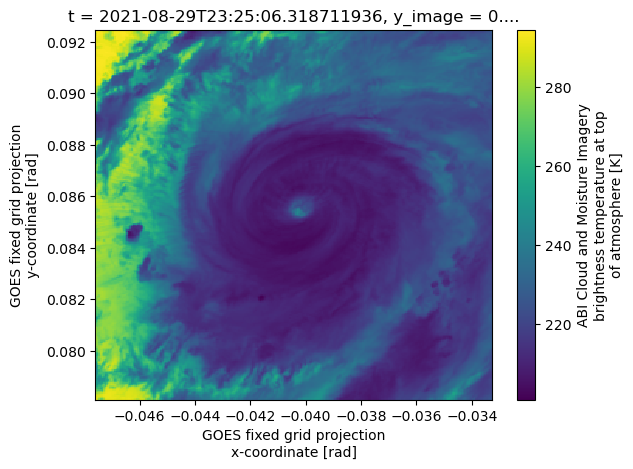

In [100]:
goes_data.CMI_C13.sel(x=slice(x-(5.5998564e-05*128), x+(5.5998564e-05*128)), y=slice(y+(5.5998564e-05*128), y-(5.5998564e-05*128))).plot()


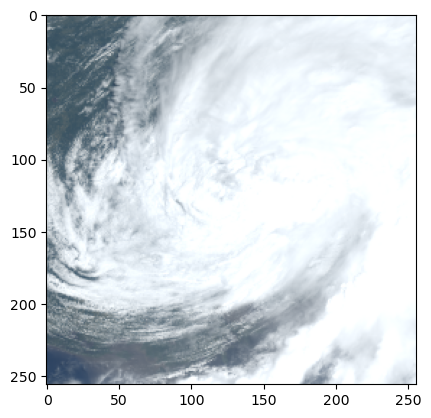

In [79]:
plt.imshow(abi.get_abi_rgb(
    goes_data.sel(x=slice(x-(5.5998564e-05*128), x+(5.5998564e-05*128)), y=slice(y+(5.5998564e-05*128), y-(5.5998564e-05*128)))
))

In [58]:
goes_data.sel(x=slice(x-(5.5998564e-05*128), x+(5.5998564e-05*128)), y=slice(y+(5.5998564e-05*128), y-(5.5998564e-05*128)))


<xarray.Dataset> Size: 8MB
Dimensions:                                 (y: 256, x: 256,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2, band: 1)
Coordinates: (12/37)
    t                                       datetime64[ns] 8B ...
  * y                                       (y) float32 1kB 0.05715 ... 0.04287
  * x                                       (x) float32 1kB -0.01862 ... -0.0...
    y_image                                 float32 4B ...
    x_image                                 float32 4B ...
    band_wavelength_C01                     (band) float32 4B ...
    ...                                      ...
    band_id_C11                             (band) int8 1B ...
    band_id_C12                             (band) int8 1B ...
    band_id_C13                             (band) int8 1B ...
    band_id_C14                             (band) int8 1B ...
    band_id_C15                             (band) int8 1B ...
    band_id_C16                             (band) int8 1B ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/124)
    CMI_C01                                 (y, x) float32 262kB ...
    DQF_C01                                 (y, x) float32 262kB ...
    CMI_C02                                 (y, x) float32 262kB ...
    DQF_C02                                 (y, x) float32 262kB ...
    CMI_C03                                 (y, x) float32 262kB ...
    DQF_C03                                 (y, x) float32 262kB ...
    ...                                      ...
    mean_brightness_temperature_C16         float32 4B ...
    std_dev_brightness_temperature_C16      float32 4B ...
    percent_uncorrectable_GRB_errors        float32 4B ...
    percent_uncorrectable_L0_errors         float32 4B ...
    dynamic_algorithm_input_data_container  int32 4B ...
    algorithm_product_version_container     int32 4B ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    date_created:              2021-08-26T12:10:02.6Z
    time_coverage_start:       2021-08-26T12:00:20.5Z
    time_coverage_end:         2021-08-26T12:09:52.4Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        e8227808-1270-45d6-9239-69a670877037

In [49]:
goes_data.y.diff("y")

<xarray.DataArray 'y' (y: 5423)> Size: 22kB
array([-5.5998564e-05, -5.5998564e-05, -5.5998564e-05, ...,
       -5.5998564e-05, -5.5998564e-05, -5.5998564e-05],
      shape=(5423,), dtype=float32)
Coordinates:
    t        datetime64[ns] 8B ...
  * y        (y) float32 22kB 0.1518 0.1517 0.1517 ... -0.1517 -0.1518 -0.1518
    y_image  float32 4B ...
    x_image  float32 4B ...

In [101]:
def get_goes_patch_on_track(filename, file_time, track_lat_spl, track_lon_spl, patch_size=256):
    with xr.open_dataset(fs.open(filename, **fsspec_caching), engine="h5netcdf") as goes_ds:
        x, y = abi.get_abi_x_y(track_lat_spl([file_time]).item(), track_lon_spl([file_time]).item(), goes_ds)
        return goes_ds.sel(
            x=slice(x-(5.5998564e-05*patch_size/2), x+(5.5998564e-05*patch_size/2)), 
            y=slice(y+(5.5998564e-05*patch_size/2), y-(5.5998564e-05*patch_size/2))
        )

In [102]:
goes_ds = get_goes_patch_on_track(abi_files.file[500], file_time.to_numpy()[500], lat_spl, lon_spl)

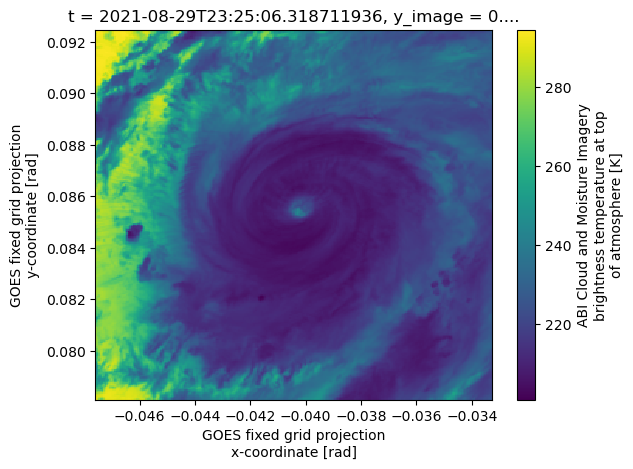

In [103]:
goes_ds.CMI_C13.plot()

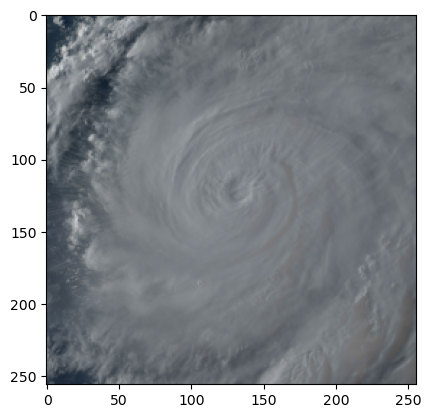

In [105]:
plt.imshow(abi.get_abi_rgb(goes_ds, night_IR=True))

In [106]:
import pathlib

In [107]:
save_dir = pathlib.Path.cwd() / "hurricane_ida_frames"
save_dir.mkdir(exist_ok=True)

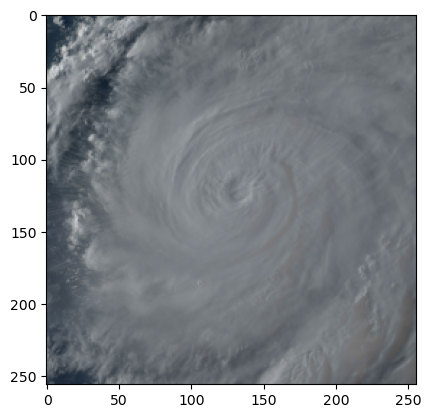

In [108]:
plt.imshow(abi.get_abi_rgb(goes_ds, night_IR=True))
plt.gcf().savefig(save_dir/"test")

In [109]:
file = abi_files.file[500]

In [111]:
pathlib.Path(file).stem

'OR_ABI-L2-MCMIPF-M6_G16_s20212412320203_e20212412329522_c20212412330019'

noaa-goes16/ABI-L2-MCMIPF/2021/241/06/OR_ABI-L2-MCMIPF-M6_G16_s20212410640205_e20212410649513_c20212410650019.nc
noaa-goes16/ABI-L2-MCMIPF/2021/241/06/OR_ABI-L2-MCMIPF-M6_G16_s20212410651337_e20212410651337_c20212410703509.nc
noaa-goes16/ABI-L2-MCMIPF/2021/241/07/OR_ABI-L2-MCMIPF-M6_G16_s20212410700205_e20212410709524_c20212410710018.nc
noaa-goes16/ABI-L2-MCMIPF/2021/241/07/OR_ABI-L2-MCMIPF-M6_G16_s20212410710205_e20212410719519_c20212410720022.nc
noaa-goes16/ABI-L2-MCMIPF/2021/241/07/OR_ABI-L2-MCMIPF-M6_G16_s20212410720205_e20212410729525_c20212410730018.nc
noaa-goes16/ABI-L2-MCMIPF/2021/241/07/OR_ABI-L2-MCMIPF-M6_G16_s20212410730205_e20212410739519_c20212410740018.nc
noaa-goes16/ABI-L2-MCMIPF/2021/241/07/OR_ABI-L2-MCMIPF-M6_G16_s20212410740205_e20212410749519_c20212410750018.nc
noaa-goes16/ABI-L2-MCMIPF/2021/241/07/OR_ABI-L2-MCMIPF-M6_G16_s20212410750205_e20212410759519_c20212410800019.nc
noaa-goes16/ABI-L2-MCMIPF/2021/241/08/OR_ABI-L2-MCMIPF-M6_G16_s20212410800205_e20212410809524_c2

KeyboardInterrupt: 

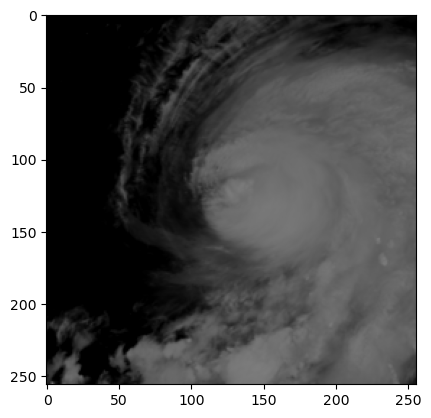

In [115]:
# for i in range(len(abi_files)):
for i in range(400,600):
    file = abi_files.file[i]
    print(file)
    plt.imshow(abi.get_abi_rgb(get_goes_patch_on_track(file, file_time.to_numpy()[i], lat_spl, lon_spl), night_IR=True))
    plt.gcf().savefig(save_dir/f'{pathlib.Path(file).stem}.png')
    

## Test mesoscan data prep

In [119]:
ida_meso_region = "M1"
ida_meso_start = datetime(2021, 8, 25, 4, 30)
ida_meso_end = datetime(2021, 8, 31, 0)

In [213]:
start_date = max(pd.to_datetime(track_ida.time.values[0]).to_pydatetime(), ida_meso_start)
end_date = min(pd.to_datetime(track_ida.time.values[-1]).to_pydatetime(), ida_meso_end)

meso_files = goes2go.goes_timerange(
    start=start_date, 
    end=end_date,
    download=False,
    domain=ida_meso_region,
)
meso_files = meso_files[meso_files.product_mode == "ABI-L2-MCMIPM1-M6"].reset_index(drop=True)

/var/folders/cw/ddjy53ds5h51szdq1630n50r0000gp/T/ipykernel_6044/3182823252.py:1: UserWarning: Discarding nonzero nanoseconds in conversion.
  start_date = max(pd.to_datetime(track_ida.time.values[0]).to_pydatetime(), ida_meso_start)
/var/folders/cw/ddjy53ds5h51szdq1630n50r0000gp/T/ipykernel_6044/3182823252.py:2: UserWarning: Discarding nonzero nanoseconds in conversion.
  end_date = min(pd.to_datetime(track_ida.time.values[-1]).to_pydatetime(), ida_meso_end)


In [214]:
meso_files

file       product_mode  \
0     noaa-goes16/ABI-L2-MCMIPM/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPM1-M6   
1     noaa-goes16/ABI-L2-MCMIPM/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPM1-M6   
2     noaa-goes16/ABI-L2-MCMIPM/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPM1-M6   
3     noaa-goes16/ABI-L2-MCMIPM/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPM1-M6   
4     noaa-goes16/ABI-L2-MCMIPM/2021/238/12/OR_ABI-L...  ABI-L2-MCMIPM1-M6   
...                                                 ...                ...   
6474  noaa-goes16/ABI-L2-MCMIPM/2021/242/23/OR_ABI-L...  ABI-L2-MCMIPM1-M6   
6475  noaa-goes16/ABI-L2-MCMIPM/2021/242/23/OR_ABI-L...  ABI-L2-MCMIPM1-M6   
6476  noaa-goes16/ABI-L2-MCMIPM/2021/242/23/OR_ABI-L...  ABI-L2-MCMIPM1-M6   
6477  noaa-goes16/ABI-L2-MCMIPM/2021/242/23/OR_ABI-L...  ABI-L2-MCMIPM1-M6   
6478  noaa-goes16/ABI-L2-MCMIPM/2021/242/23/OR_ABI-L...  ABI-L2-MCMIPM1-M6   

     satellite                   start                     end  \
0          G16 2021-08-26 12:00:27.800 2021-08-26 12:00:34.100   
1          G16 2021-08-26 12:01:24.900 2021-08-26 12:01:30.600   
2          G16 2021-08-26 12:02:24.900 2021-08-26 12:02:31.700   
3          G16 2021-08-26 12:03:24.900 2021-08-26 12:03:31.200   
4          G16 2021-08-26 12:04:24.900 2021-08-26 12:04:30.600   
...        ...                     ...                     ...   
6474       G16 2021-08-30 23:55:25.000 2021-08-30 23:55:31.300   
6475       G16 2021-08-30 23:56:25.000 2021-08-30 23:56:30.700   
6476       G16 2021-08-30 23:57:25.000 2021-08-30 23:57:31.300   
6477       G16 2021-08-30 23:58:25.000 2021-08-30 23:58:31.300   
6478       G16 2021-08-30 23:59:25.000 2021-08-30 23:59:30.700   

                    creation         product mode_bands  mode  band  
0    2021-08-26 12:00:42.100  ABI-L2-MCMIPM1         M6     6  None  
1    2021-08-26 12:01:39.000  ABI-L2-MCMIPM1         M6     6  None  
2    2021-08-26 12:02:39.500  ABI-L2-MCMIPM1         M6     6  None  
3    2021-08-26 12:03:39.400  ABI-L2-MCMIPM1         M6     6  None  
4    2021-08-26 12:04:39.400  ABI-L2-MCMIPM1         M6     6  None  
...                      ...             ...        ...   ...   ...  
6474 2021-08-30 23:55:39.200  ABI-L2-MCMIPM1         M6     6  None  
6475 2021-08-30 23:56:39.200  ABI-L2-MCMIPM1         M6     6  None  
6476 2021-08-30 23:57:38.400  ABI-L2-MCMIPM1         M6     6  None  
6477 2021-08-30 23:58:40.300  ABI-L2-MCMIPM1         M6     6  None  
6478 2021-08-30 23:59:40.700  ABI-L2-MCMIPM1         M6     6  None  

[6479 rows x 10 columns]

In [215]:
meso_file_time = meso_files.start + (meso_files.end - meso_files.start)/2

In [216]:
i = 3000
file = meso_files.file[i]
meso_patch = get_goes_patch_on_track(file, meso_file_time.to_numpy()[i], lat_spl, lon_spl)

In [217]:
meso_patch

<xarray.Dataset> Size: 8MB
Dimensions:                                 (y: 256, x: 256,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2, band: 1)
Coordinates: (12/37)
    t                                       datetime64[ns] 8B ...
  * y                                       (y) float32 1kB 0.07994 ... 0.06566
  * x                                       (x) float32 1kB -0.03732 ... -0.0...
    y_image                                 float32 4B ...
    x_image                                 float32 4B ...
    band_wavelength_C01                     (band) float32 4B ...
    ...                                      ...
    band_id_C11                             (band) int8 1B ...
    band_id_C12                             (band) int8 1B ...
    band_id_C13                             (band) int8 1B ...
    band_id_C14                             (band) int8 1B ...
    band_id_C15                             (band) int8 1B ...
    band_id_C16                             (band) int8 1B ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/124)
    CMI_C01                                 (y, x) float32 262kB ...
    DQF_C01                                 (y, x) float32 262kB ...
    CMI_C02                                 (y, x) float32 262kB ...
    DQF_C02                                 (y, x) float32 262kB ...
    CMI_C03                                 (y, x) float32 262kB ...
    DQF_C03                                 (y, x) float32 262kB ...
    ...                                      ...
    mean_brightness_temperature_C16         float32 4B ...
    std_dev_brightness_temperature_C16      float32 4B ...
    percent_uncorrectable_GRB_errors        float32 4B ...
    percent_uncorrectable_L0_errors         float32 4B ...
    dynamic_algorithm_input_data_container  int32 4B ...
    algorithm_product_version_container     int32 4B ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    date_created:              2021-08-28T14:00:41.2Z
    time_coverage_start:       2021-08-28T14:00:27.8Z
    time_coverage_end:         2021-08-28T14:00:34.7Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        6f7a3b52-99b8-4fa9-bf7a-660a8fdd60d6

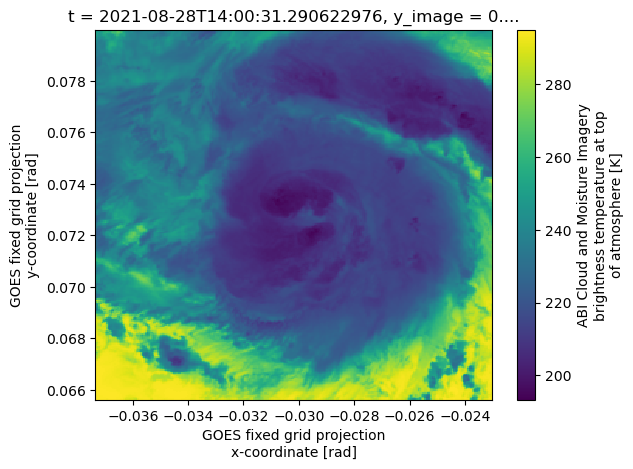

In [218]:
meso_patch.CMI_C13.plot()

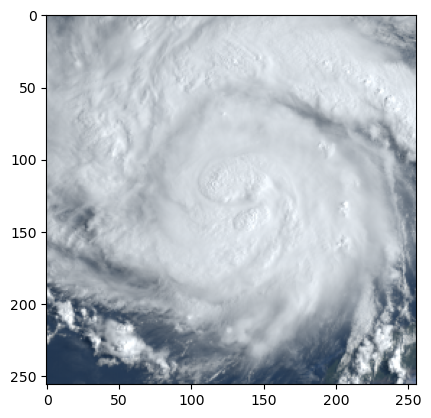

In [219]:
plt.imshow(abi.get_abi_rgb(meso_patch, night_IR=True))

In [220]:
lats, lons = abi.get_abi_lat_lon(meso_patch)

In [221]:
np.unique(np.round(lats))

array([22., 23., 24., 25., 26., 27., 28.])

In [222]:
np.unique(np.round(lons))

array([-89., -88., -87., -86., -85., -84., -83.])

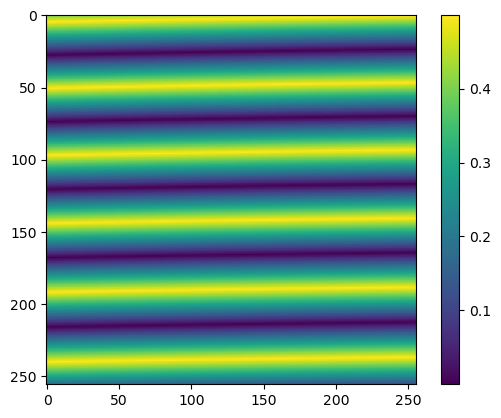

In [223]:
plt.imshow(np.abs(lats - np.round(lats)))
plt.colorbar()

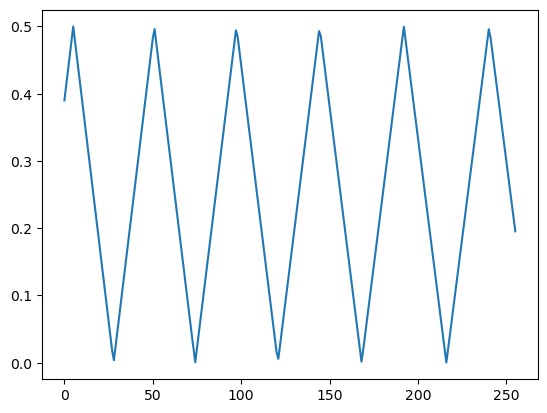

In [224]:
plt.plot(np.abs(lats - np.round(lats))[:,0])

In [225]:
from scipy.signal import argrelmin

In [226]:
argrelmin(np.abs(lats - np.round(lats))[:,0])[0]

array([ 28,  74, 121, 168, 216])

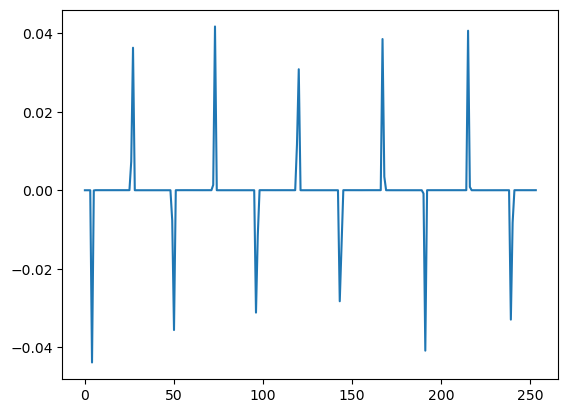

In [227]:
plt.plot(np.diff(np.abs(lats - np.round(lats))[:,0], n=2))

In [228]:
np.diff(np.abs(lats - np.round(lats))[:,0], n=2).size

254

In [229]:
(np.diff(np.abs(lats - np.round(lats))[:,0], n=2) > 0.02).sum()

np.int64(5)

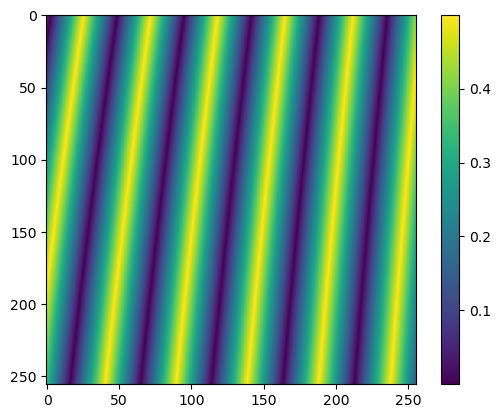

In [230]:
plt.imshow(np.abs(lons - np.round(lons)))
plt.colorbar()

In [231]:
np.abs(lons - np.round(lons)).min()

np.float64(1.4690858506583027e-05)

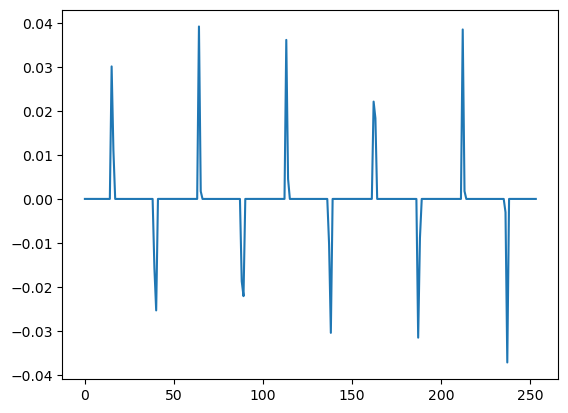

In [232]:
plt.plot(np.diff(np.abs(lons - np.round(lons))[-1], n=2))

In [233]:
(np.diff(np.abs(lons - np.round(lons))[-1], n=2) > 0.02).sum()

np.int64(5)

In [234]:
12924/60

215.4

([<matplotlib.axis.YTick at 0x3954a4cd0>,
 [Text(0, 28, '27 °N'),
  Text(0, 74, '26 °N'),
  Text(0, 121, '25 °N'),
  Text(0, 168, '24 °N'),
  Text(0, 216, '23 °N')])

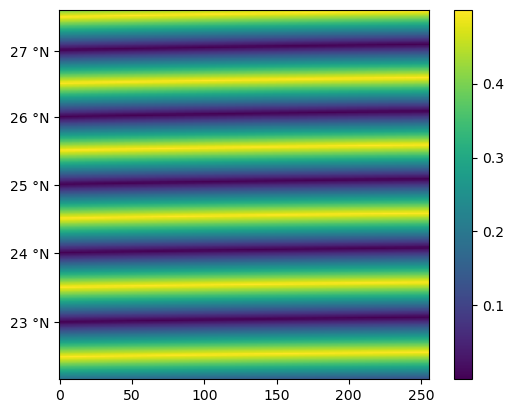

In [235]:
plt.imshow(np.abs(lats - np.round(lats)))
plt.colorbar()
round_lats = np.round(lats[:,0])
wh_round_lats = np.where(np.diff(np.abs(lats[:,0] - round_lats), n=2) > 0.02)[0] + 1
round_lat_values = round_lats[wh_round_lats]
plt.yticks(wh_round_lats, [f'{val:.0f} °N' if val >= 0 else f'{-val:.0f} °S' for val in round_lat_values])

([<matplotlib.axis.XTick at 0x394c52850>,
 [Text(16, 0, '88 °W'),
  Text(65, 0, '87 °W'),
  Text(114, 0, '86 °W'),
  Text(163, 0, '85 °W'),
  Text(213, 0, '84 °W')])

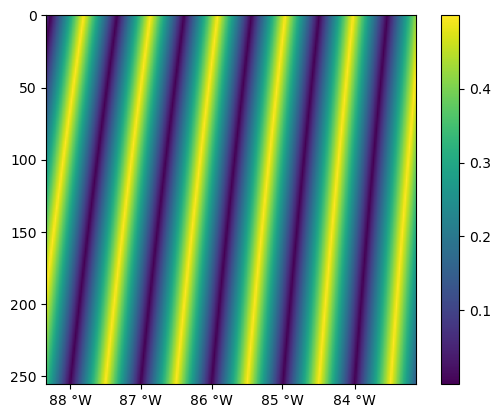

In [236]:
plt.imshow(np.abs(lons - np.round(lons)))
plt.colorbar()
round_lons = np.round(lons[-1])
wh_round_lons = np.where(np.diff(np.abs(lons[-1] - round_lons), n=2) > 0.02)[0] + 1
round_lat_values = round_lons[wh_round_lons]
plt.xticks(wh_round_lons, [f'{val:.0f} °E' if val >= 0 else f'{-val:.0f} °W' for val in round_lat_values])

In [237]:
def add_abi_lat_lon_labels(goes_ds, ax=None):
    if ax is None:
        ax = plt.gca()
    
    lats, lons = abi.get_abi_lat_lon(goes_ds)

    round_lats = np.round(lats[:,0])
    wh_round_lats = argrelmin(np.abs(lats[:,0] - round_lats))[0]
    round_lat_values = round_lats[wh_round_lats]
    ax.set_yticks(wh_round_lats, [f'{val:.0f} °N' if val >= 0 else f'{-val:.0f} °S' for val in round_lat_values])

    round_lons = np.round(lons[-1])
    wh_round_lons = argrelmin(np.abs(lons[-1] - round_lons))[0]
    round_lat_values = round_lons[wh_round_lons]
    ax.set_xticks(wh_round_lons, [f'{val:.0f} °E' if val >= 0 else f'{-val:.0f} °W' for val in round_lat_values])

Text(1.0, 1.0, '2021-08-28 14:00:31')

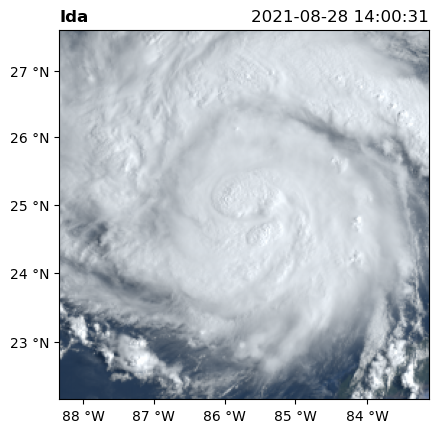

In [238]:
fig, ax = plt.subplots()
ax.imshow(abi.get_abi_rgb(meso_patch, night_IR=True))
add_abi_lat_lon_labels(meso_patch, ax)
ax.set_title("Ida", loc="left", fontweight="bold")
ax.set_title(f'{meso_file_time[i].to_pydatetime().strftime("%Y-%m-%d %H:%M:%S")}', loc="right")

In [239]:
meso_file_time[i].to_numpy()

np.datetime64('2021-08-28T14:00:31.250000000')

In [240]:
save_dir = pathlib.Path.cwd() / "hurricane_ida_meso_frames"
save_dir.mkdir(exist_ok=True)

In [245]:
# for i in range(len(abi_files)):
for i in range(4120, 4320):
    file = meso_files.file[i]
    date = meso_file_time[i]
    print(i, date, file)
    meso_patch = get_goes_patch_on_track(file, date.to_numpy(), lat_spl, lon_spl)
    fig, ax = plt.subplots()
    ax.imshow(abi.get_abi_rgb(meso_patch, night_IR=True))
    add_abi_lat_lon_labels(meso_patch, ax)
    ax.set_title("Ida", loc="left", fontweight="bold")
    ax.set_title(f'{date.to_pydatetime().strftime("%Y-%m-%d %H:%M:%S")}', loc="right")
    fig.savefig(save_dir/f'{pathlib.Path(file).stem}.png')
    plt.close(fig)

4120 2021-08-29 08:41:28.050000 noaa-goes16/ABI-L2-MCMIPM/2021/241/08/OR_ABI-L2-MCMIPM1-M6_G16_s20212410841249_e20212410841312_c20212410841394.nc
4121 2021-08-29 08:42:27.800000 noaa-goes16/ABI-L2-MCMIPM/2021/241/08/OR_ABI-L2-MCMIPM1-M6_G16_s20212410842249_e20212410842307_c20212410842389.nc
4122 2021-08-29 08:43:28.050000 noaa-goes16/ABI-L2-MCMIPM/2021/241/08/OR_ABI-L2-MCMIPM1-M6_G16_s20212410843249_e20212410843312_c20212410843395.nc
4123 2021-08-29 08:44:28.050000 noaa-goes16/ABI-L2-MCMIPM/2021/241/08/OR_ABI-L2-MCMIPM1-M6_G16_s20212410844249_e20212410844312_c20212410844393.nc
4124 2021-08-29 08:45:27.800000 noaa-goes16/ABI-L2-MCMIPM/2021/241/08/OR_ABI-L2-MCMIPM1-M6_G16_s20212410845249_e20212410845307_c20212410845393.nc
4125 2021-08-29 08:46:27.750000 noaa-goes16/ABI-L2-MCMIPM/2021/241/08/OR_ABI-L2-MCMIPM1-M6_G16_s20212410846249_e20212410846306_c20212410846396.nc
4126 2021-08-29 08:47:27.750000 noaa-goes16/ABI-L2-MCMIPM/2021/241/08/OR_ABI-L2-MCMIPM1-M6_G16_s20212410847249_e202124108473